In [2]:
#########LOAD DATA

import numpy as np
import librosa
import librosa.display

pathAudio = "result/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
print(files.shape)

X = []
Y = []
Z = []
P = []

for file in files:
  x,fs = librosa.load(file,sr=8000, mono = True, duration=1.0) 

  ##Comparing each audio file
  X.append(x)
  Y.append(librosa.amplitude_to_db(np.abs(np.fft.fft(x,8000))))
  Z.append(librosa.feature.spectral_bandwidth(y=x, sr=fs))
  f0, voiced_flag, voiced_probs = librosa.pyin(x,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
  P.append(f0)


X = np.array(X)
print("The shape of X is")
print(X.shape)

Y = np.array(Y)
print("The shape of Y is")
print(Y.shape)

Z = np.array(Z)
Z = np.reshape(Z,(660, 16))
print("The shape of Z is")
print(Z.shape)

P = np.array(P)
print("The shape of P is")
print(P.shape)

ZP = np.concatenate((X,Y,Z,P), axis=-1)
print(ZP.shape)


(660,)
The shape of X is
(660, 8000)
The shape of Y is
(660, 8000)
The shape of Z is
(660, 16)
The shape of P is
(660, 16)
(660, 16032)


In [3]:
#########STANDARIZATION

import os

mux = np.mean(X, axis=0)
print(mux.shape)
stdx = np.max(X, axis=0)
print(stdx.shape)
Xmus = (X-mux)/stdx
print(Xmus.shape)

muy = np.mean(Y, axis=0)
print(muy.shape)
stdy = np.std(Y, axis=0)
print(stdy.shape)
Ymus = (Y-muy)/stdy
print(Ymus.shape)

muz = np.mean(Z, axis=0)
print(muz.shape)
stdz = np.std(Z, axis=0)
print(stdz.shape)
Zmus = (Z-muz)/stdz
print(Zmus.shape)

Pf = []
for x in P:
 x = x[~np.isnan(x)]
 Pf.append(x)

mup =  np.mean(Pf, axis=0)
print(mup.shape)
stdp = np.std(Pf, axis=0)
print(stdp.shape)
Pmus = (Pf-mup)/stdp
print(Pmus.shape)

ZPf = []
for x in ZP:
 x = x[~np.isnan(x)]
 ZPf.append(x)

muzp =  np.mean(ZPf, axis=0)
print(muzp.shape)
stdzp = np.std(ZPf, axis=0)
print(stdzp.shape)
ZPmus = (ZPf-muzp)/stdzp
print(ZPmus.shape)



(8000,)
(8000,)
(660, 8000)
(8000,)
(8000,)
(660, 8000)
(16,)
(16,)
(660, 16)
(15,)
(15,)
(660, 15)
(16031,)
(16031,)
(660, 16031)


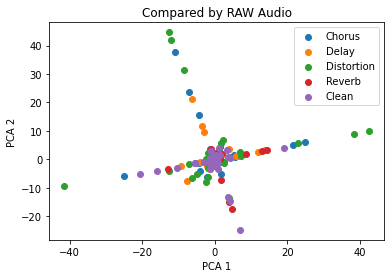

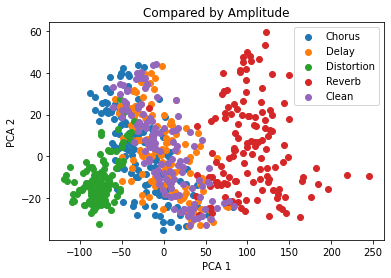

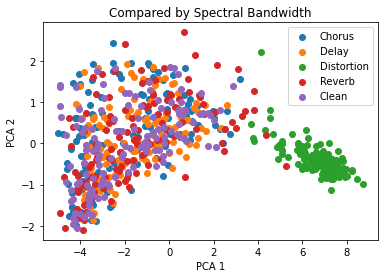

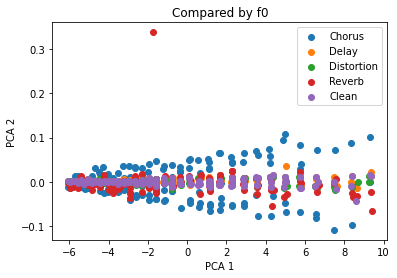

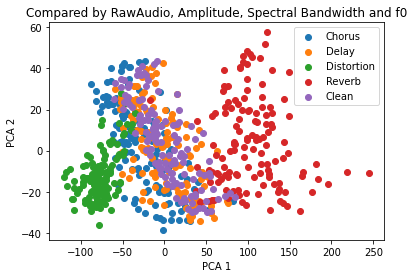

In [4]:
############PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pcax = PCA(n_components=4)
X_PCA = pcax.fit_transform(Xmus)

plt.scatter(X_PCA[:131, 0],X_PCA[:131, 1], label='Chorus')
plt.scatter(X_PCA[132:264, 0],X_PCA[132:264, 1], label='Delay')
plt.scatter(X_PCA[265:396, 0],X_PCA[265:396, 1], label='Distortion')
plt.scatter(X_PCA[397:528, 0],X_PCA[397:528, 1], label='Reverb')
plt.scatter(X_PCA[529:660, 0],X_PCA[529:660, 1], label='Clean')

plt.title('Compared by RAW Audio')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

pcay = PCA(n_components=4)
Y_PCA = pcay.fit_transform(Ymus)

plt.scatter(Y_PCA[:131, 0],Y_PCA[:131, 1], label='Chorus')
plt.scatter(Y_PCA[132:264, 0],Y_PCA[132:264, 1], label='Delay')
plt.scatter(Y_PCA[265:396, 0],Y_PCA[265:396, 1], label='Distortion')
plt.scatter(Y_PCA[397:528, 0],Y_PCA[397:528, 1], label='Reverb')
plt.scatter(Y_PCA[529:660, 0],Y_PCA[529:660, 1], label='Clean')

plt.title('Compared by Amplitude')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

pcaz = PCA(n_components=4)
Z_PCA = pcaz.fit_transform(Zmus)

plt.scatter(Z_PCA[:131, 0],Z_PCA[:131, 1], label='Chorus')
plt.scatter(Z_PCA[132:264, 0],Z_PCA[132:264, 1], label='Delay')
plt.scatter(Z_PCA[265:396, 0],Z_PCA[265:396, 1], label='Distortion')
plt.scatter(Z_PCA[397:528, 0],Z_PCA[397:528, 1], label='Reverb')
plt.scatter(Z_PCA[529:660, 0],Z_PCA[529:660, 1], label='Clean')

plt.title('Compared by Spectral Bandwidth')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


pcap = PCA(n_components=4)
P_PCA = pcap.fit_transform(Pmus)

plt.scatter(P_PCA[:131, 0],P_PCA[:131, 1], label='Chorus')
plt.scatter(P_PCA[132:264, 0],P_PCA[132:264, 1], label='Delay')
plt.scatter(P_PCA[265:396, 0],P_PCA[265:396, 1], label='Distortion')
plt.scatter(P_PCA[397:528, 0],P_PCA[397:528, 1], label='Reverb')
plt.scatter(P_PCA[529:660, 0],P_PCA[529:660, 1], label='Clean')

plt.title('Compared by f0')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


pcap = PCA(n_components=4)
ZP_PCA = pcap.fit_transform(ZPmus)

plt.scatter(ZP_PCA[:131, 0],ZP_PCA[:131, 1], label='Chorus')
plt.scatter(ZP_PCA[132:264, 0],ZP_PCA[132:264, 1], label='Delay')
plt.scatter(ZP_PCA[265:396, 0],ZP_PCA[265:396, 1], label='Distortion')
plt.scatter(ZP_PCA[397:528, 0],ZP_PCA[397:528, 1], label='Reverb')
plt.scatter(ZP_PCA[529:660, 0],ZP_PCA[529:660, 1], label='Clean')

plt.title('Compared by RawAudio, Amplitude, Spectral Bandwidth and f0')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()






In [6]:

pathAudio = "di/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
print(files.shape)

X = []
Y = []
Z = []
P = []

for file in files:
  x,fs = librosa.load(file,sr=8000, mono = True, duration=1.0) 

  ##Comparing each audio file
  X.append(x)
  Y.append(librosa.amplitude_to_db(np.abs(np.fft.fft(x,8000))))
  Z.append(librosa.feature.spectral_bandwidth(y=x, sr=fs))
  f0, voiced_flag, voiced_probs = librosa.pyin(x,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
  P.append(f0)


X = np.array(X)
print("The shape of X is")
print(X.shape)

Y = np.array(Y)
print("The shape of Y is")
print(Y.shape)

Z = np.array(Z)
Z = np.reshape(Z,(138, 16))
print("The shape of Z is")
print(Z.shape)

P = np.array(P)
print("The shape of P is")
print(P.shape)

ZP = np.concatenate((X,Y,Z,P), axis=-1)
print(ZP.shape)


(138,)
The shape of X is
(138, 8000)
The shape of Y is
(138, 8000)
The shape of Z is
(138, 16)
The shape of P is
(138, 16)
(138, 16032)


In [7]:
#########STANDARIZATION

mux = np.mean(X, axis=0)
print(mux.shape)
stdx = np.max(X, axis=0)
print(stdx.shape)
Xmus = (X-mux)/stdx
print(Xmus.shape)

muy = np.mean(Y, axis=0)
print(muy.shape)
stdy = np.std(Y, axis=0)
print(stdy.shape)
Ymus = (Y-muy)/stdy
print(Ymus.shape)

muz = np.mean(Z, axis=0)
print(muz.shape)
stdz = np.std(Z, axis=0)
print(stdz.shape)
Zmus = (Z-muz)/stdz
print(Zmus.shape)

Pf = []
for x in P:
 x = x[~np.isnan(x)]
 Pf.append(x)

mup =  np.mean(Pf, axis=0)
print(mup.shape)
stdp = np.std(Pf, axis=0)
print(stdp.shape)
Pmus = (Pf-mup)/stdp
print(Pmus.shape)

ZPf = []
for x in ZP:
 x = x[~np.isnan(x)]
 ZPf.append(x)

muzp =  np.mean(ZPf, axis=0)
print(muzp.shape)
stdzp = np.std(ZPf, axis=0)
print(stdzp.shape)
ZPmus = (ZPf-muzp)/stdzp
print(ZPmus.shape)


(8000,)
(8000,)
(138, 8000)
(8000,)
(8000,)
(138, 8000)
(16,)
(16,)
(138, 16)
(15,)
(15,)
(138, 15)
(16031,)
(16031,)
(138, 16031)


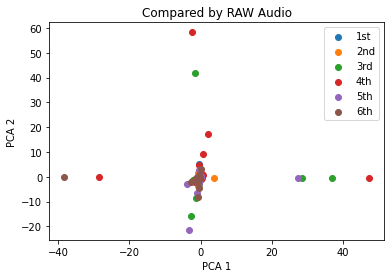

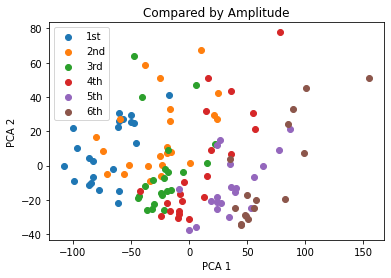

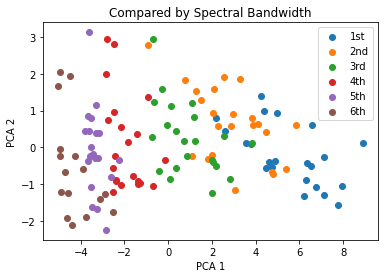

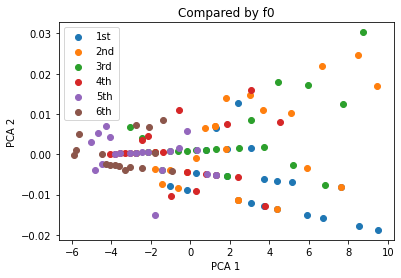

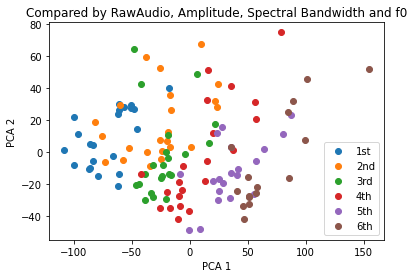

In [8]:
############PCA

pcax = PCA(n_components=6)
X_PCA = pcax.fit_transform(Xmus)

plt.scatter(X_PCA[:22, 0],X_PCA[:22, 1], label='1st')
plt.scatter(X_PCA[23:46, 0],X_PCA[23:46, 1], label='2nd')
plt.scatter(X_PCA[47:69, 0],X_PCA[47:69, 1], label='3rd')
plt.scatter(X_PCA[71:92, 0],X_PCA[71:92, 1], label='4th')
plt.scatter(X_PCA[95:115, 0],X_PCA[95:115, 1], label='5th')
plt.scatter(X_PCA[116:132, 0],X_PCA[116:132, 1], label='6th')

plt.title('Compared by RAW Audio')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

pcay = PCA(n_components=6)
Y_PCA = pcay.fit_transform(Ymus)

plt.scatter(Y_PCA[:22, 0],Y_PCA[:22, 1], label='1st')
plt.scatter(Y_PCA[23:46, 0],Y_PCA[23:46, 1], label='2nd')
plt.scatter(Y_PCA[47:69, 0],Y_PCA[47:69, 1], label='3rd')
plt.scatter(Y_PCA[71:92, 0],Y_PCA[71:92, 1], label='4th')
plt.scatter(Y_PCA[95:115, 0],Y_PCA[95:115, 1], label='5th')
plt.scatter(Y_PCA[116:132, 0],Y_PCA[116:132, 1], label='6th')

plt.title('Compared by Amplitude')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

pcaz = PCA(n_components=6)
Z_PCA = pcaz.fit_transform(Zmus)

plt.scatter(Z_PCA[:22, 0],Z_PCA[:22, 1], label='1st')
plt.scatter(Z_PCA[23:46, 0],Z_PCA[23:46, 1], label='2nd')
plt.scatter(Z_PCA[47:69, 0],Z_PCA[47:69, 1], label='3rd')
plt.scatter(Z_PCA[71:92, 0],Z_PCA[71:92, 1], label='4th')
plt.scatter(Z_PCA[95:115, 0],Z_PCA[95:115, 1], label='5th')
plt.scatter(Z_PCA[116:132, 0],Z_PCA[116:132, 1], label='6th')

plt.title('Compared by Spectral Bandwidth')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


pcap = PCA(n_components=4)
P_PCA = pcap.fit_transform(Pmus)

plt.scatter(P_PCA[:22, 0],P_PCA[:22, 1], label='1st')
plt.scatter(P_PCA[23:46, 0],P_PCA[23:46, 1], label='2nd')
plt.scatter(P_PCA[47:69, 0],P_PCA[47:69, 1], label='3rd')
plt.scatter(P_PCA[71:92, 0],P_PCA[71:92, 1], label='4th')
plt.scatter(P_PCA[95:115, 0],P_PCA[95:115, 1], label='5th')
plt.scatter(P_PCA[116:132, 0],P_PCA[116:132, 1], label='6th')

plt.title('Compared by f0')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


pcap = PCA(n_components=4)
ZP_PCA = pcap.fit_transform(ZPmus)

plt.scatter(ZP_PCA[:22, 0],ZP_PCA[:22, 1], label='1st')
plt.scatter(ZP_PCA[23:46, 0],ZP_PCA[23:46, 1], label='2nd')
plt.scatter(ZP_PCA[47:69, 0],ZP_PCA[47:69, 1], label='3rd')
plt.scatter(ZP_PCA[71:92, 0],ZP_PCA[71:92, 1], label='4th')
plt.scatter(ZP_PCA[95:115, 0],ZP_PCA[95:115, 1], label='5th')
plt.scatter(ZP_PCA[116:132, 0],ZP_PCA[116:132, 1], label='6th')

plt.title('Compared by RawAudio, Amplitude, Spectral Bandwidth and f0')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


